<a href="https://colab.research.google.com/github/LukasEder1/DeepLearning/blob/main/project/lyric_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT-2 Fine-Tuning Tutorial with PyTorch & Huggingface in Colab




In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
#https://www.kaggle.com/datasets/mervedin/genius-lyrics
!unzip "/content/gdrive/MyDrive/archive.zip"

Archive:  /content/gdrive/MyDrive/archive (1).zip
  inflating: (Scriptonite).csv       
  inflating: 2 Chainz.csv            
  inflating: 2Pac.csv                
  inflating: 50 Cent.csv             
  inflating: A Boogie wit da Hoodie.csv  
  inflating: AAP Rocky.csv           
  inflating: Arctic Monkeys.csv      
  inflating: Ariana Grande.csv       
  inflating: BROCKHAMPTON.csv        
  inflating: BTS.csv                 
  inflating: Beyonc.csv              
  inflating: Big Sean.csv            
  inflating: Booba.csv               
  inflating: Chance the Rapper.csv   
  inflating: Chief Keef.csv          
  inflating: Childish Gambino.csv    
  inflating: Chris Brown.csv         
  inflating: DJ Khaled.csv           
  inflating: Damso.csv               
  inflating: Drake.csv               
  inflating: Ed Sheeran.csv          
  inflating: Eminem.csv              
  inflating: Fetty Wap.csv           
  inflating: Frank Ocean.csv         
  inflating: Future.csv           

In [88]:
import pandas as pd
songs = pd.read_csv("/content/The Beatles.csv")
songs2 = pd.read_csv("/content/2Pac.csv")

In [91]:
songs = songs.append(songs2)

,artist,id,lyrics_owner_id,primary_artist_id,primary_artist_name,song_art_image_thumbnail_url,title,url,pageviews,lyrics
0,The Beatles,1575,7,586,The Beatles,https://images.genius.com/38df3b59f231f4babd59...,Let It Be,https://genius.com/The-beatles-let-it-be-lyrics,1464634,Let It Be Lyrics[Verse 1]\nWhen I find myself ...
1,The Beatles,2236,7,586,The Beatles,https://images.genius.com/a2cc11cd0780d0542e4e...,Yesterday,https://genius.com/The-beatles-yesterday-lyrics,1320595,Yesterday Lyrics[Verse 1]\nYesterday\nAll my t...
2,The Beatles,56218,29141,586,The Beatles,https://images.genius.com/04df901371547072bab6...,Come Together,https://genius.com/The-beatles-come-together-l...,1082725,Come Together Lyrics[Intro]\nShoot me\nShoot m...
3,The Beatles,82381,4619460,586,The Beatles,https://images.genius.com/537342a11e2455300f30...,Hey Jude,https://genius.com/The-beatles-hey-jude-lyrics,1061468,Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
4,The Beatles,87577,133789,586,The Beatles,https://images.genius.com/003c2b3d4b489659367e...,Here Comes the Sun,https://genius.com/The-beatles-here-comes-the-...,994581,Here Comes the Sun Lyrics[Chorus]\nHere comes ...
...,...,...,...,...,...,...,...,...,...,...
95,2Pac,2177,2383,59,2Pac,https://images.genius.com/4f924e981b74c6d754d2...,16 on Death Row,https://genius.com/2pac-16-on-death-row-lyrics,79702,16 on Death Row Lyrics[Intro]\nDeath Row\nThat...
96,2Pac,6530,50,59,2Pac,https://images.genius.com/839619da9eb2d92ecf53...,Violent,https://genius.com/2pac-violent-lyrics,78382,Violent Lyrics[Verse 1]\nThey claim that I'm v...
97,2Pac,6587,50,59,2Pac,https://images.genius.com/45d6f7f5bdb846d9e4e8...,When We Ride,https://genius.com/2pac-when-we-ride-lyrics,77892,When We Ride Lyrics[Intro: 2Pac]\nOutlaw Immor...
98,2Pac,127919,8534,59,2Pac,https://images.genius.com/06dee150ef8c1c103f89...,In the Event of My Demise (Poem),https://genius.com/2pac-in-the-event-of-my-dem...,75100,In the Event of My Demise (Poem) LyricsIn the ...


# Setup

In [56]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import os
import time
import datetime
from google.colab import drive

import pandas as pd
import seaborn as sns
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)

from transformers import GPT2LMHeadModel,  GPT2Tokenizer, GPT2Config, GPT2LMHeadModel
from transformers import AdamW, get_linear_schedule_with_warmup

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
!nvidia-smi

Tue Feb  7 16:11:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |   8772MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Create Training Set

The data used to finetune the language model is a set of around 1000 DJ biographies, with the aim of generating them in the same general format and style.

This data isn't public so if you want to use this script, you'll have to source your own training set.

In [59]:
songs.dropna(inplace=True) #remove NA values
lyrics = songs.lyrics.copy() #just use the main bio text in this example
lyrics

0     Let It Be Lyrics[Verse 1]\nWhen I find myself ...
1     Yesterday Lyrics[Verse 1]\nYesterday\nAll my t...
2     Come Together Lyrics[Intro]\nShoot me\nShoot m...
3     Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
4     Here Comes the Sun Lyrics[Chorus]\nHere comes ...
                            ...                        
95    She Said She Said Lyrics[Verse 1]\nShe said, "...
96    The Continuing Story of Bungalow Bill Lyrics[C...
97    Her Majesty Lyrics[Verse]\nHer Majesty's a pre...
98    I’ve Got a Feeling Lyrics[Verse 1: Paul McCart...
99    Run for Your Life Lyrics[Verse 1: John Lennon]...
Name: lyrics, Length: 100, dtype: object

We need to get an idea of how long our training documents are.

I'm not going to use the same tokenizer as the GPT2 one, which is a [byte pair encoding tokenizer](https://blog.floydhub.com/tokenization-nlp/). Instead, I'm using a simple one just to get a rough understanding.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


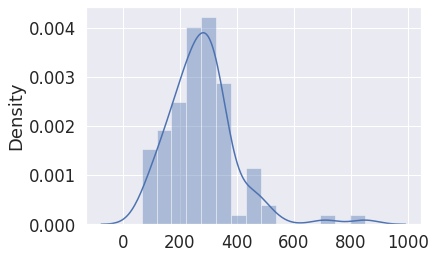

In [60]:
doc_lengths = []

for bio in lyrics:

    # get rough token count distribution
    tokens = nltk.word_tokenize(bio)

    doc_lengths.append(len(tokens))

doc_lengths = np.array(doc_lengths)

sns.distplot(doc_lengths)

In [61]:
# the max token length   
len(doc_lengths[doc_lengths > 768])/len(doc_lengths)

0.01

In [62]:
np.average(doc_lengths)

276.97

Even though these token counts won't match up to the BPE tokenizer's, I'm confident that most bios will be fit under the 768 embedding size limit for the small GPT2 model.

# GPT2 Tokenizer

Although the defaults take care of this,I thought I'd show that you can specify some of the special tokens. 

In [63]:
# Load the GPT tokenizer.
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>') #gpt2-medium


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [64]:
print("The max model length is {} for this model, although the actual embedding size for GPT small is 768".format(tokenizer.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

The max model length is 1024 for this model, although the actual embedding size for GPT small is 768
The beginning of sequence token <|startoftext|> token has the id 50257
The end of sequence token <|endoftext|> has the id 50256
The padding token <|pad|> has the id 50258


# PyTorch Datasets & Dataloaders


GPT2 is a large model. Increasing the batch size above 2 has lead to out of memory problems. This can be mitigated by accumulating the gradients but that is out of scope here.

In [65]:
batch_size = 2

I'm using the standard PyTorch approach of loading data in using a [dataset class](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

I'm passing in the tokenizer as an argument but normally I would  instantiate it within the class.

In [66]:
class GPT2Dataset(Dataset):

  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=768):

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list:

      encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', truncation=True, max_length=max_length, padding="max_length")

      self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
    
  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx] 

To understand how I've used the tokenizer, it's worth reading [the docs](https://huggingface.co/transformers/main_classes/tokenizer.html). I've wrapped each bio in the bos and eos tokens.

Every tensor passed to the model should be the same length.

If the bio is shorter than 768 tokens, it will be padded to a length of 768 using the padding token. In addition, an attention mask will be returned that needs to be passed to the model to tell it to ignore the padding tokens. 

If the bio is longer than 768 tokens, it will be truncated without the eos_token. This isn't a problem.

In [67]:
dataset = GPT2Dataset(lyrics, tokenizer, max_length=768)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

   90 training samples
   10 validation samples


In [68]:
# Create the DataLoaders for our training and validation datasets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

# Finetune GPT2 Language Model

In [69]:
# I'm not really doing anything with the config buheret
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)

# instantiate the model
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)

# this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
# otherwise the tokenizer and model tensors won't match up
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [70]:
# some parameters I cooked up that work reasonably well

epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8

# this produces sample output every 100 steps
sample_every = 100

In [71]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon
                )

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [72]:
# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
# This changes the learning rate as the training loop progresses
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [73]:
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [74]:
total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()        

        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]  

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every x batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
            
            model.train()

        loss.backward()

        optimizer.step()

        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids, 
#                            token_type_ids=None, 
                             attention_mask = b_masks,
                            labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 5 ========
Training...

  Average training loss: 7.12
  Training epoch took: 0:00:21

Running Validation...
  Validation Loss: 1.00
  Validation took: 0:00:01

======== Epoch 2 / 5 ========
Training...

  Average training loss: 1.14
  Training epoch took: 0:00:21

Running Validation...
  Validation Loss: 0.83
  Validation took: 0:00:01

======== Epoch 3 / 5 ========
Training...

  Average training loss: 0.92
  Training epoch took: 0:00:22

Running Validation...
  Validation Loss: 0.79
  Validation took: 0:00:01

======== Epoch 4 / 5 ========
Training...

  Average training loss: 0.83
  Training epoch took: 0:00:22

Running Validation...
  Validation Loss: 0.79
  Validation took: 0:00:01

======== Epoch 5 / 5 ========
Training...

  Average training loss: 0.78
  Training epoch took: 0:00:23

Running Validation...
  Validation Loss: 0.79
  Validation took: 0:00:01

Training complete!
Total training took 0:01:53 (h:mm:ss)


Let's view the summary of the training process.

In [75]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,7.12,1.00,0:00:21,0:00:01
2,1.14,0.83,0:00:21,0:00:01
3,0.92,0.79,0:00:22,0:00:01
4,0.83,0.79,0:00:22,0:00:01
5,0.78,0.79,0:00:23,0:00:01


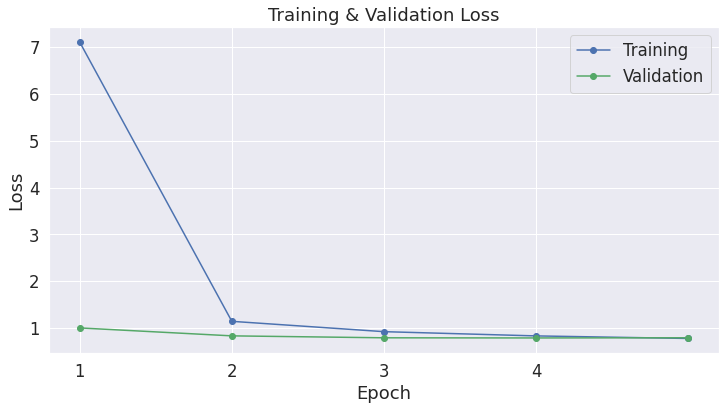

In [76]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

# Display Model Info

In [77]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The GPT-2 model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The GPT-2 model has 148 different named parameters.

==== Embedding Layer ====

transformer.wte.weight                                  (50259, 768)
transformer.wpe.weight                                   (1024, 768)

==== First Transformer ====

transformer.h.0.ln_1.weight                                   (768,)
transformer.h.0.ln_1.bias                                     (768,)
transformer.h.0.attn.c_attn.weight                       (768, 2304)
transformer.h.0.attn.c_attn.bias                             (2304,)
transformer.h.0.attn.c_proj.weight                        (768, 768)
transformer.h.0.attn.c_proj.bias                              (768,)
transformer.h.0.ln_2.weight                                   (768,)
transformer.h.0.ln_2.bias                                     (768,)
transformer.h.0.mlp.c_fc.weight                          (768, 3072)
transformer.h.0.mlp.c_fc.bias                                (3072,)
transformer.h.0.mlp.c_proj.weight                        (3072

# Saving & Loading Fine-Tuned Model


In [78]:
# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.json',
 './model_save/merges.txt',
 './model_save/added_tokens.json')

In [79]:
!ls -l --block-size=K ./model_save/

total 499888K
-rw-r--r-- 1 root root      1K Feb  7 16:13 added_tokens.json
-rw-r--r-- 1 root root      1K Feb  7 16:13 config.json
-rw-r--r-- 1 root root      1K Feb  7 16:13 generation_config.json
-rw-r--r-- 1 root root    446K Feb  7 16:13 merges.txt
-rw-r--r-- 1 root root 498442K Feb  7 16:13 pytorch_model.bin
-rw-r--r-- 1 root root      1K Feb  7 16:13 special_tokens_map.json
-rw-r--r-- 1 root root      1K Feb  7 16:13 tokenizer_config.json
-rw-r--r-- 1 root root    976K Feb  7 16:13 vocab.json


In [80]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

-rw-r--r-- 1 root root 487M Feb  7 16:13 ./model_save/pytorch_model.bin


In [81]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ $data_dir

# # Load a trained model and vocabulary that you have fine-tuned
#model = GPT2LMHeadModel.from_pretrained(output_dir)
#tokenizer = GPT2Tokenizer.from_pretrained(output_dir)
#model.to(device)

cp: missing destination file operand after './model_save/'
Try 'cp --help' for more information.


# Generate Text

In [86]:
model.eval()

prompt = "<|startoftext|>"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

print(generated)

sample_outputs = model.generate(
                                generated, 
                                #bos_token_id=random.randint(1,30000),
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
  print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[50257]], device='cuda:0')
0: The land that I've known and loved has always been ours"

– John Lennon
[Verse 1]
I should go out into the world and rob it of my wife
And then she would cry
And when I went out of the world she would cry in the face of the people
And when I got down to town I'd get up and sing an old song
That I thought made all the world laugh
[Chorus]
[Verse 2]
My life seems so long ago
I know that I would cry in the face of the people
And then she would cry
And when I got down to town
 I'd get up and sing an old song
That I thought made all the world laugh
[Chorus]

[Verse 3]
My life seems so long ago
I know that I would cry in the face of the people
And then she would cry
And when I got down to town
 I'd get up and sing an old song
That I thought made all the world laugh

[Chorus]
[Verse 4]
My life seems so long ago
I know that I would cry in the face of the people
And then she would cry
And when I got down to town
 I'd get up and sing an old song
That I thoug